# Data Structures course 
Shiraz University Fall 2024    
Reza Rezazadegan   
www.dreamintelligent.com 

 

## The sequence interface (abstract data type)
**Sequences** maintain a collection of items in an **extrinsic order**, where each item stored has a rank (index) in the sequence, including a first item and a last item. 

Examples of data structures corresponding to the sequence interface: Python lists, arrays in C and vectors in C++.  


![Screenshot 2024-09-11 132441.png](<attachment:Screenshot 2024-09-11 132441.png>)



In this chapter we study 3 data structures which implement the sequence interface: **static array**, **linked list** and **dynamic array**.  

![Screenshot 2024-09-11 132620.png](<attachment:Screenshot 2024-09-11 132620.png>)

**Stacks** (aka First In Last Out) and **Queues** (aka First In First Out) are special cases of sequence interface.   

stack  | `insert_last(x)` and `delete_last()`   
queue | `insert_last(x)` and `delete_first()`
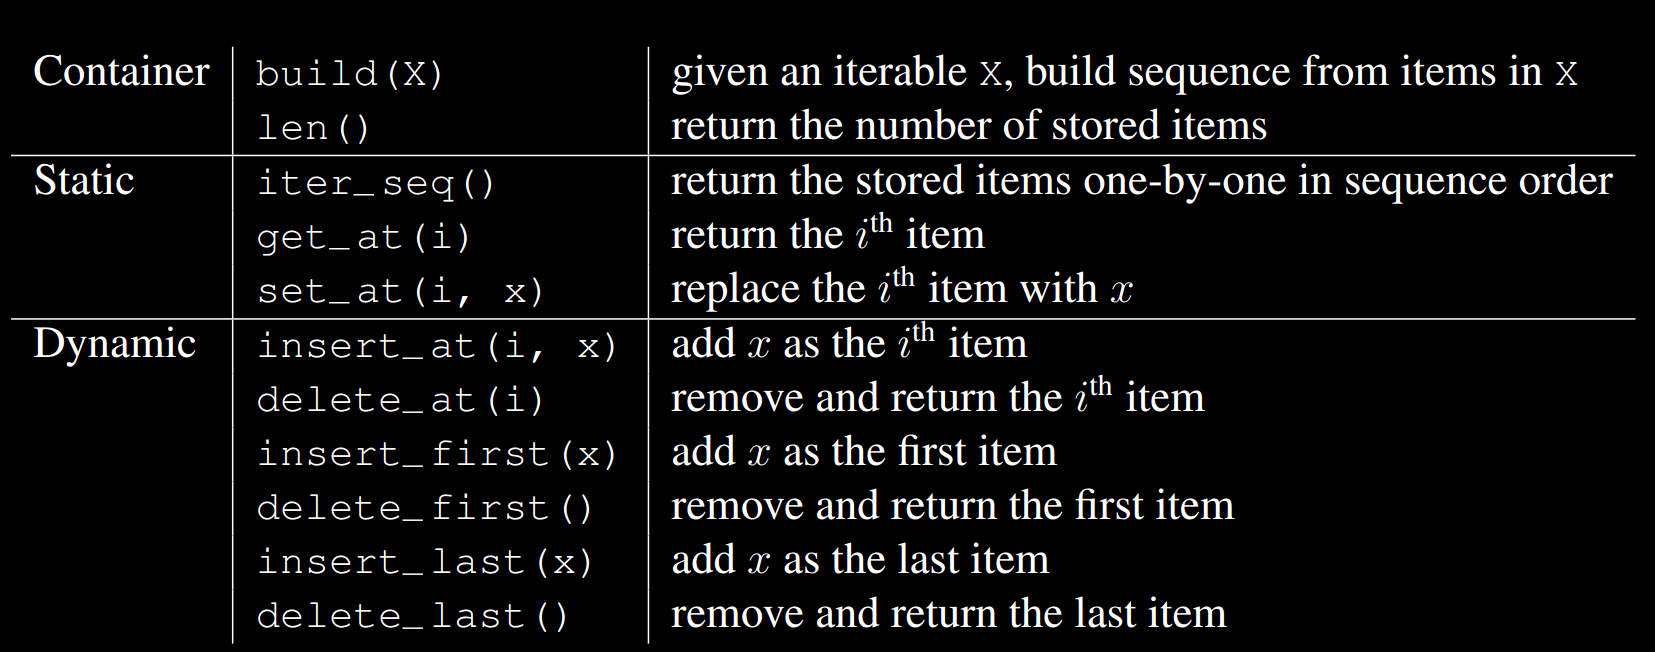
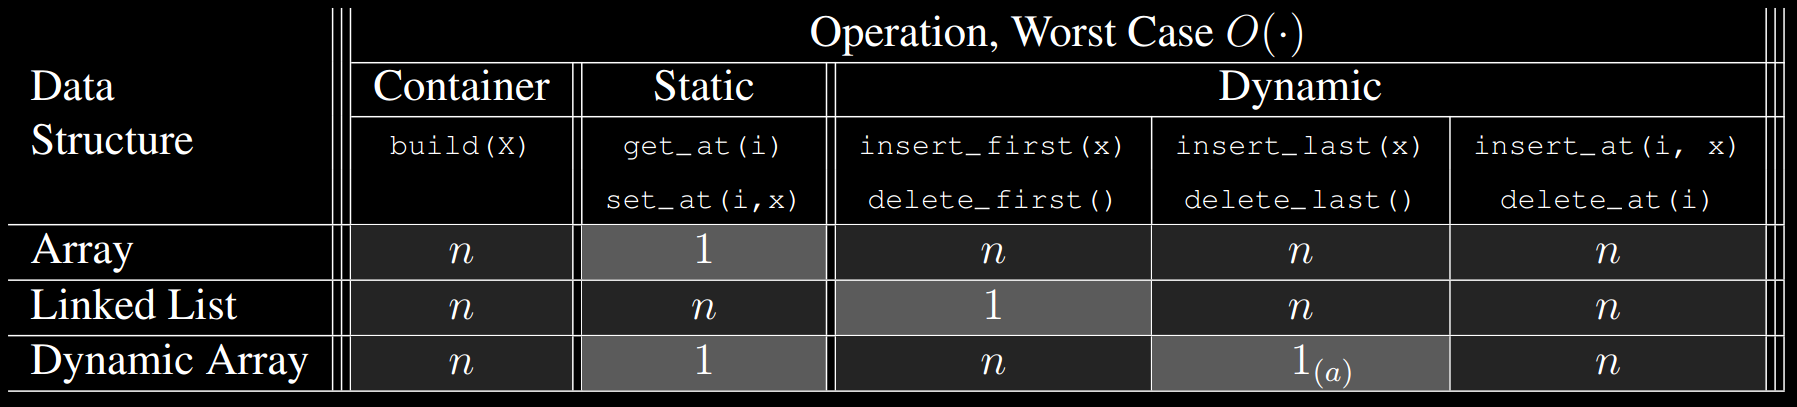

A **set** maintains a collection of items based on an _intrinsic_ property.

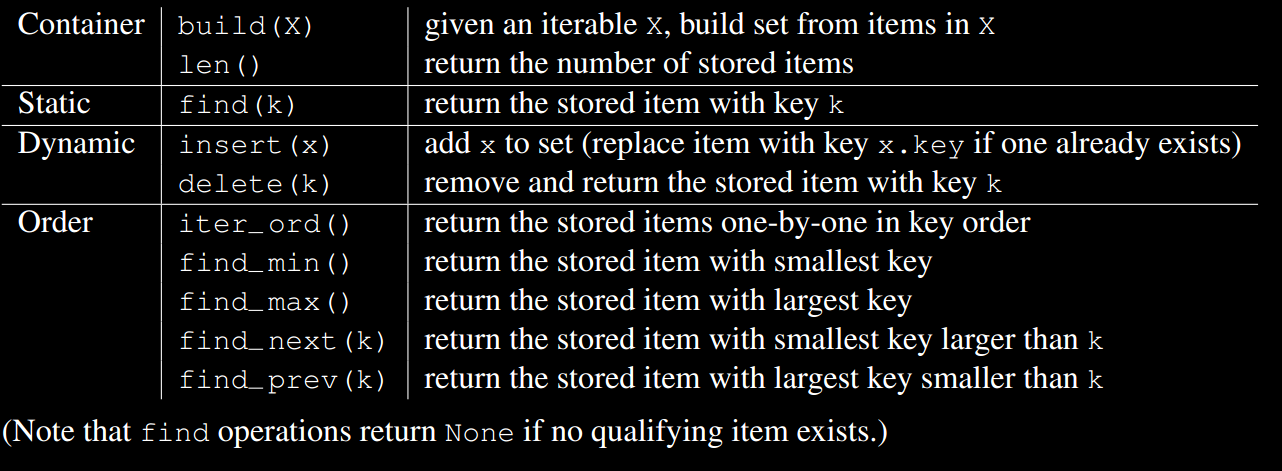

Special case: dictionary or map (Set without the Order operations)

## Static Array sequence

In python static arrays are imlemented in the `array` library. Here we implement them by making use of Python lists, _pretending_ that `[None]*n` is an empty array of size $n$. However we won't make use of Python lists after this, and will build each data structure based upon the data structures previously constructed in the course.  


In [1]:
#import ctypes

class Array:    
    def __init__(self, size=0): # O(1)
        self._elements = [None]*size
        self._size = size

    # Creates an array with size elements.
    #def __init__( self, size=0 ):
    #  assert size >= 0, "Array size must be >= 0"
      #print("Initializing an array of size ", size)
    #  self._size = size
    #  # Create the array structure using the ctypes module.
    #  PyArrayType = ctypes.py_object * size
    #  self._elements = PyArrayType()
    #  # Initialize each element.
    #  self.clear( 0)    

    def __len__(self): return self._size # O(1)
    def __iter__(self): yield from self._elements # O(n) iter_seq

    def build(self, X): # O(n)
        self._elements = [a for a in X] # pretend this builds a static array
        self._size = len(self._elements)
        
        
    def get_at(self, index): 
        assert index >= 0 and index < len(self), "Array subscript out of range"
        return self._elements[ index ] # O(1)
        

    def set_at(self, index, value): 
       assert index >= 0 and index < len(self), "Array subscript out of range"
       self._elements[ index ] =value    # O(1)

    def _copy_forward(self, i, n, A, j): # O(n)
        """Copies self._elements[i:i+n] to A[j:j+n]."""
        for k in range(n):
            A[j + k] = self._elements[i + k]

    def _copy_backward(self, i, n, A, j): # O(n)
        """ Copies self._elements[i:i+n] to A[j:j+n] starting from the 
        last element and moving backwards.
        """
        for k in range(n - 1, -1, -1):
            A[j + k] = self._elements[i + k]

    def insert_at(self, i, x): # O(n)
        n = len(self)
        A = [None]* (n+1)
        self._copy_forward(0, i, A, 0)
        A[i] = x
        self._copy_forward(i, n - i, A, i + 1)
        self.build(A)

    def delete_at(self, i): # O(n)
        n = len(self)
        A = [None] * (n - 1)
        self._copy_forward(0, i, A, 0)
        x = self._elements[i]
        self._copy_forward(i + 1, n - i - 1, A, i)
        self.build(A)
        return x
        # O(n)

    def insert_first(self, x): self.insert_at(0, x)
    def delete_first(self): return self.delete_at(0)
    def insert_last(self, x): self.insert_at(len(self), x)
    def delete_last(self): return self.delete_at(len(self) - 1)


   # Gets the contents of the index element.
    def __getitem__( self, index ):
        return self.get_at(self,index)
   
 

   # Puts the value in the array element at index position.
    def __setitem__( self, index, value ):
        return self.set_at( self, index, value )
      

   # Clears the array by setting each element to the given value.
    def clear( self, value ):
      for i in range( len(self) ) :
         self._elements[i] = value

   # Returns the array's iterator for traversing the elements.
      #def __iter__( self ):
      #   return _ArrayIterator( self._elements )



In [13]:
X=Array()
X.build([0,1])
for i in X:
    print(i)


0
1


In [14]:
X.insert_first(6)
for i in X:
    print(i)

6
0
1


# Dynamic array sequence

If an array gets full and we want to resize it, we'll have to copy its contents to a new location in memory. This takes O(n) time.

To reduce the number of such copying (reallocation) operations, we overallocate memory, i.e. if we have $n$ elements, we allocate memory for $(1+r)n$  elements where $0<r$. For Python list $r=1/8$.

As long as $r>0$, the average complexity of appending an element to the list is $O(1)$. The average is taken over all the possible operations of appending an element to the lsit. Say, we have created a list with n elements and $r=1$, so the size of the list is 2n. The first n appending operations have cost 1 and only the last one has cost $O(n)$. Thus on average the complexity is $O(1)$!  You can see that as long as $r>0$ this holds, no matter how many times we have to reallocate.

The complexity of an algorithm, averaged over all the ways the input can be, is called **Amortized Complexity**. E.g. for a sorting algorithm, the list may be already sorted, or sorted in reverse,... and there are $n!$ total cases. 


**For deletions:** if a large number of the elements of the array are deleted we'd better shrink the size of the array so that unused memory is not occupied. However we have to note that new elements may be added after such an operation!

To achieve constant amortized running time for any sequence of n appends or pops, we need to make sure there remains a linear fraction of 
unused allocated space when we rebuild to a smaller array, which guarantees that at least Ω(n) sequential dynamic operations must occur before the next time we need to reallocate memory. 

When removing down to one fourth of the allocation, the contents of the array are transferred to an allocation that is half as large. 


In [ ]:
class Dynamic_Array_Seq(Array):
    def __init__(self, r = 2): # O(1)
        super().__init__()
        self._size = 0
        self.r = r  # resizing factor
        self._compute_bounds()
        self._resize(0)

    def __len__(self): return self._size # O(1)

    def __iter__(self): # O(n)
        for i in range(len(self)): yield self._elements[i]
    
    def build(self, X): # O(n)
        for a in X: self.insert_last(a)
    
    def _compute_bounds(self): # O(1)
        self.upper = len(self._elements)   # The current capacity of the dynamic array

        # The capacity of the dynamic array divided by the square of the resize factor (here 4)
        # used for deciding when to shrink the array after a series of item deletions.
        self.lower = len(self._elements) // (self.r * self.r) 

    def _resize(self, n): # O(1) or O(n)
        if (self.lower < n < self.upper): return
        
        m = max(n, 1) * self.r # New capacity
        A = Array(m)
        self._copy_forward(0, self._size, A, 0)
        self._elements = A
        self._compute_bounds()
    
    def insert_last(self, x): # O(1)a
        self._resize(self._size + 1)
        self._elements[self._size] = x
        self.size += 1
    
    def delete_last(self): # O(1)a
        self._elements[self._size - 1] = None
        self.size -= 1
        self._resize(self._size)
    
    def insert_at(self, i, x): # O(n)
        self.insert_last(None)
        self._copy_backward(i, self._size - (i + 1), self._elements, i + 1)
        self.A[i] = x
    
    def delete_at(self, i): # O(n)
        x = self._elements[i]
        self._copy_forward(i + 1, self._size - (i + 1), self._elements, i)
        self.delete_last()
        return x # O(n)

    def insert_first(self, x): self.insert_at(0, x)
    def delete_first(self): return self.delete_at(0)

## Searching in arrays

In [ ]:
# Linear search
def LinearSearch(A, key):   # O(n)
    n=len(A)
    for i in range(0,n):
        if A[i]==key:
            return i

    return -1    

In [ ]:
print(a)
LinearSearch(a,1)

array('i', [3, 100, 18, 1])


3

### Searching in a sorted array

Binary search has complexity $O(\log n)$.

In [ ]:
def BinarySearch(A,key):
    min=0
    max=len(A)-1

    while(max>min+1):
        #print(min, max)
        avg=int((max+min)/2)
        if key==A[avg]:
            return avg
        elif key>A[avg]:
            min=avg
        else:
            max=avg

    return -1            



In [ ]:
from array import *
A=array('i', [1,3, 6, 9, 11, 20])

In [ ]:
BinarySearch(A, 6)

2

In [ ]:
BinarySearch(A,11)

4

In [ ]:
BinarySearch(A,100)

-1

# Implementing 2d arrays

Similar to a 1-D array but now has member functions `numRows`, `numCols` and the indices are tuples: X[2,3] 


In [99]:
# Implementation of the Array2D ADT using an array of arrays.

class Array2D :
    # Creates a 2-D array of size numRows x numCols.
    def __init__( self, numRows, numCols ):
        # Create a 1-D array to store an array reference for each row.
        self._theRows = Array( numRows ) 
        # Create the 1-D arrays for each row of the 2-D array.
        for i in range( numRows ) :
            self._theRows[i] = Array( numCols )

    # Returns the number of rows in the 2-D array.
    def numRows( self ):
        return len( self._theRows )

    # Returns the number of columns in the 2-D array.
    def numCols( self ):
        return len( self._theRows[0] )

    # Clears the array by setting every element to the given value.
    def clear( self, value ):
        for i in  range(len(self._theRows)) :
            self._theRows[i].clear( value )

    # Gets the contents of the element at position [i, j]
    def __getitem__( self, ndxTuple ):
        assert len(ndxTuple) == 2, "Invalid number of array subscripts."
        #row = ndxTuple[0]
        #col = ndxTuple[1]
        row, col=ndxTuple
        assert row >= 0 and row < self.numRows() \
        and col >= 0 and col < self.numCols(), \
        "Array subscript out of range."
        the1dArray = self._theRows[row]
        return the1dArray[col]

    # Sets the contents of the element at position [i,j] to value.
    def __setitem__( self, ndxTuple, value ):
        assert len(ndxTuple) == 2, "Invalid number of array subscripts."
        row = ndxTuple[0]
        col = ndxTuple[1]
        assert row >= 0 and row < self.numRows() \
        and col >= 0 and col < self.numCols(), \
        "Array subscript out of range."
        the1dArray = self._theRows[row]
        the1dArray[col] = value


In [100]:
X=Array2D(2,3)

Initializing an array of size  2
Initializing an array of size  3
Initializing an array of size  3


In [101]:
X[1,2]=3

In [102]:
X[1,2]

3

# Matrices
Similar to a 2-D array but has extra member functions such as scalar multiplication (multiplying the matrix by a scalar), transposition, addition, multiplication, etc. 


In [103]:
# Implementation of the Matrix ADT using a 2-D array.
#from array import Array2D 
class Matrix :
    # Creates a matrix of size numRows x numCols initialized to 0.
    def __init__( self, numRows, numCols ):
        self._theGrid = Array2D( numRows, numCols )
        self._theGrid.clear( 0 )

    # Returns the number of rows in the matrix.
    def numRows( self ):
        return self._theGrid.numRows()

    # Returns the number of columns in the matrix.
    def numCols( self ):
        return self._theGrid.numCols()

    # Returns the value of element (i, j): x[i,j]
    def __getitem__( self, ndxTuple ):
        return self._theGrid[( ndxTuple[0], ndxTuple[1] )]

    # Sets the value of element (i,j) to the value s: x[i,j] = s
    def __setitem__( self, ndxTuple, scalar ):
        self._theGrid[ ndxTuple[0], ndxTuple[1] ] = scalar
    
    # Scales the matrix by the given scalar.
    def scaleBy( self, scalar ):
        for r in range( self.numRows() ) :
            for c in range( self.numCols() ) :
                self[ r, c ] *= scalar

    # Creates and returns a new matrix that is the transpose of this matrix.
    def tranpose( self ):
        #Write the code! ......
        A=Matrix(self.numCols(), self.numRows())
        for r in range( self.numRows() ) :
            for c in range( self.numCols() ) :
                A[c,r]=self[r,c]
        return A        


    # Creates and returns a new matrix that results from matrix addition.
    def __add__( self, rhsMatrix ):
        assert rhsMatrix.numRows() == self.numRows() and \
        rhsMatrix.numCols() == self.numCols(), \
        "Matrix sizes not compatible for the add operation."
    
        # Create the new matrix.
        newMatrix = Matrix( self.numRows(), self.numCols() )
        # Add the corresponding elements in the two matrices.
        for r in range( self.numRows() ) :
            for c in range( self.numCols() ) :
                newMatrix[ r, c ] = self[ r, c ] + rhsMatrix[ r, c ]
        return newMatrix

    # Creates and returns a new matrix that results from matrix subtraction.
    #def __sub__( self, rhsMatrix ):
    #    #Write the code ......

    # Creates and returns a new matrix resulting from matrix multiplication.
    def __mul__( self, rhsMatrix ):
        #Write the code  ......
        assert self.numCols()==rhsMatrix.numRows(), "Matrix sizes do not match for multiplication."
        A=Matrix(self.numRows(), rhsMatrix.numCols())
        for i in range(A.numRows()):
            for j in range(A.numCols()):
                X=0
                for k in range(self.numCols()):
                    X+=self[i,k]* rhsMatrix[k,j]

                A[i,j]=X
        return A        
    def printt(self):
        for i in range (self.numRows()):
            for j in range(self.numCols()):
                print(self[i,j], end=" ")
            print("\n")    

In [104]:
A=Matrix(2,2)
B=Matrix(2,1)

A[0,0]=1
A[1,1]=2

B[1,0]=-1
B[0,0]=3

Initializing an array of size  2
Initializing an array of size  2
Initializing an array of size  2
Initializing an array of size  2
Initializing an array of size  1
Initializing an array of size  1


In [105]:
C=A*B

Initializing an array of size  2
Initializing an array of size  1
Initializing an array of size  1


In [106]:
C.printt()

3 

-2 



# Game of life

In [111]:
# Implements the LifeGrid ADT for use with the game of Life.
#from array import Array2D
class LifeGrid :
    # Defines constants to represent the cell states.
    DEAD_CELL = 0
    LIVE_CELL = 1 
    
    #Creates the game grid and initializes the cells to dead.
    def __init__( self, numRows, numCols ):
        # Allocate the 2-D array for the grid.
        self._grid = Array2D( numRows, numCols )
        # Clear the grid and set all cells to dead.
        self.configure( list() )

    # Returns the number of rows in the grid.
    def numRows( self ):
        return self._grid.numRows()

    # Returns the number of columns in the grid.
    def numCols( self ):
        return self._grid.numCols()

    # Configures the grid to contain the given live cells.
    def configure( self, coordList ):
        # Clear the game grid.
        for i in range( self.numRows() ):
            for j in range( self.numCols() ):
                self.clearCell( i, j )

        # Set the indicated cells to be alive.
        for coord in coordList :
            self.setCell( coord[0], coord[1] )

    # Does the indicated cell contain a live organism?
    def isLiveCell( self, row, col ):
        return self._grid[row, col] == LifeGrid.LIVE_CELL

    # Clears the indicated cell by setting it to dead.
    def clearCell( self, row, col ):
        self._grid[row, col] = LifeGrid.DEAD_CELL

    # Sets the indicated cell to be alive.
    def setCell( self, row, col ):
        self._grid[row, col] = LifeGrid.LIVE_CELL

    # Returns the number of live neighbors for the given cell.
    def numLiveNeighbors( self, row, col ):
        numLiveNbhs=0
        for i in range(-1, 2):
            for j in range(-1,2):
                if i==0 and j==0: #excluding the cell itself
                    continue
                nbh=(i+row, j+col)
                if nbh[0]<0 or nbh[0]>=self.numRows() \
                or nbh[1]<0 or nbh[1]>=self.numCols():
                    continue
                numLiveNbhs+=1 if self.isLiveCell(nbh[0], nbh[1]) else 0
        return numLiveNbhs

In [113]:
# Program for playing the game of Life.
#from life import LifeGrid
# Define the initial configuration of live cells.
INIT_CONFIG = [ (1,1), (1,2), (2,2), (3,2) ] 
#Set the size of the grid.
GRID_WIDTH = 5
GRID_HEIGHT = 5

# Indicate the number of generations.
NUM_GENS = 8

def main():
    # Construct the game grid and configure it.
    grid = LifeGrid( GRID_WIDTH, GRID_HEIGHT )
    grid.configure( INIT_CONFIG )

    # Play the game.
    draw( grid )
    for i in range( NUM_GENS ):
        evolve( grid )
        draw( grid )

 # Generates the next generation of organisms.
def evolve( grid ):
    # List for storing the live cells of the next generation.
    liveCells =[] 

    # Iterate over the elements of the grid.
    for i in range( grid.numRows() ) :
        for j in range( grid.numCols() ) :

            # Determine the number of live neighbors for this cell.
            Liveneighbors = grid.numLiveNeighbors( i, j )

            # Add the (i,j) tuple to liveCells if this cell contains
            # a live organism in the next generation.
            if (Liveneighbors == 2 and grid.isLiveCell( i, j )) or \
            (Liveneighbors == 3 ) :
                liveCells.append( (i, j) )
                

    # Reconfigure the grid using the liveCells coord list.
    grid.configure( liveCells )

 # Prints a text-based representation of the game grid.
def draw( grid ):
    for i in range( grid.numRows() ) :
        for j in range( grid.numCols() ) :
            if grid.isLiveCell(i,j):
                print("@", end=" ")
            else:
                print(".", end=" ")
        print()  
    print()              
 
 

 # Executes the main routine.
main()

Initializing an array of size  5
Initializing an array of size  5
Initializing an array of size  5
Initializing an array of size  5
Initializing an array of size  5
Initializing an array of size  5
. . . . . 
. @ @ . . 
. . @ . . 
. . @ . . 
. . . . . 

. . . . . 
. @ @ . . 
. . @ @ . 
. . . . . 
. . . . . 

. . . . . 
. @ @ @ . 
. @ @ @ . 
. . . . . 
. . . . . 

. . @ . . 
. @ . @ . 
. @ . @ . 
. . @ . . 
. . . . . 

. . @ . . 
. @ . @ . 
. @ . @ . 
. . @ . . 
. . . . . 

. . @ . . 
. @ . @ . 
. @ . @ . 
. . @ . . 
. . . . . 

. . @ . . 
. @ . @ . 
. @ . @ . 
. . @ . . 
. . . . . 

. . @ . . 
. @ . @ . 
. @ . @ . 
. . @ . . 
. . . . . 

. . @ . . 
. @ . @ . 
. @ . @ . 
. . @ . . 
. . . . . 



# Sparse Matrices

In [ ]:
class SparseMatrix :
    
    # Create a sparse matrix of size numRows x numCols initialized to 0.
    def __init__( self, numRows, numCols ):
        self._numRows = numRows
        self._numCols = numCols
        self._elementList = []

    # Return the number of rows in the matrix.
    def numRows( self ):
        return self._numRows

    # Return the number of columns in the matrix.
    def numCols( self ):
        return self._numCols

    # Return the value of element (i, j): x[i,j]
    def __getitem__( self, ndxTuple ):
        i,j=ndxTuple
        
        assert i>0 and i<self.numRows() and j>0 and j<self.numCols(), "Index out of range."
        
        index=self._findPosition(i,j)
        if index==None:
            return 0
        else:
            return self._elementList[index]
            


    # Set the value of element (i,j) to the value s: x[i,j] = s
    def __setitem__( self, ndxTuple, scalar ):
        ndx = self._findPosition( ndxTuple[0], ndxTuple[1] )
        
        if ndx is not None : # if the element is found in the list.
            if scalar != 0.0 :
                self._elementList[ndx].value = scalar
            else :
                self._elementList.pop( ndx )
        else : # if the element is zero and not in the list.
            if scalar != 0.0 :
                element = _MatrixElement( ndxTuple[0], ndxTuple[1], scalar )
        self._elementList.append( element )

    # Scale the matrix by the given scalar.
    def scaleBy( self, scalar ):
        if scalar==0:
            self._elementList.clear()
            return
        
        for element in self._elementList :
            element.value *= scalar

    
    
    # Helper method used to find a specific matrix element (row,col) in the
    # list of non-zero entries. None is returned if the element is not found.
    def _findPosition( self, row, col ): #The turns the index of the element
        n = len( self._elementList )
        for i in range( n ) :
            if row == self._elementList[i].row and \
            col == self._elementList[i].col:
                return i # return the index of the element if found.
        return None # return None when the element is zero.

    # Storage class for holding the non-zero matrix elements.
    class _MatrixElement:
         def __init__( self, row, col, value ):
            self.row = row
            self.col = col
            self.value = value


    def __add__( self, rhsMatrix ):
        assert rhsMatrix.numRows() == self.numRows() and \
        rhsMatrix.numCols() == self.numCols(), \
        "Matrix sizes not compatible for the add operation." 
        
        # Create the new matrix.
        newMatrix = SparseMatrix( self.numRows(), self.numCols() )

        # Duplicate the lhs matrix. The elements are mutable, thus we must
        # create new objects and not simply copy the references.
        for element in self._elementList :
            dupElement = _MatrixElement(element.row, element.col, element.value)
            newMatrix._elementList.append( dupElement )

        # Iterate through each non-zero element of the rhsMatrix.
        for element in rhsMatrix._elementList :
            # Get the value of the corresponding element in the new matrix.
            value = newMatrix[ element.row, element.col ] #value from the left hand matrix
            value += element.value  #element.value is from the right hand matrix
            # Store the new value back to the new matrix.
            newMatrix[ element.row, element.col ] = value

            # Return the new matrix.
            return newMatrix


    def __mul__( self, rhsMatrix ):
        # (A*B)_i,j=\sum_k A_i,k * B_k,j 
        
        # dict to keep the nonzero summands of (A*B)_i,j
        nonzero_elements={}
        assert self.numCols()==rhsMatrix.numRows(), "Matrices can't be multiplied!"

        product=SparseMatrix(self.numRows(), rhsMatrix.numCols())


        for element in self._elementList:
            i=element.row
            k=element.col

            
            for element2 in rhsMatrix._elementList:
                if k==element2.row:
                    j=element2.col

                    s=element.value* element2.value

                    if (i,j) in nonzero_elements:
                        nonzero_elements[(i,j)].append(s)
                    else:
                        nonzero_elements[(i,j)]=[s] 

        for (i,j) in nonzero_elements:
            S=sum(nonzero_elements[(i,j)])
            product[i,j]=S
        return product    



# Exercises
1- Implement the 2-D array and matrix data types using a 1-D array. Hint: you'll need to make use of the remainder operator for converting 2-D indices to 1-D ones and vice versa. 